# Hipótesis la F1 es más rápida
#### Análisis a través de la velocidad media por año, el tiempo medio de las carreras por año, y las vueltas rápidas por año

> Importación librería

In [31]:
import pandas as pd
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [32]:
pd.set_option('display.max_rows',5000)

# FASTEST LAP

> Importación datos y ajustes

In [34]:
fastest_lap_1950_2020 = pd.read_csv('Data/fastest_laps_1950-2020.csv')
fastest_lap_1950_2020.head()
años50_70 = fastest_lap_1950_2020[(fastest_lap_1950_2020['Year']>=1950)&(fastest_lap_1950_2020['Year']<=1970)]
años70 = fastest_lap_1950_2020[(fastest_lap_1950_2020['Year']>=1971)&(fastest_lap_1950_2020['Year']<1980)]
años80 = fastest_lap_1950_2020[(fastest_lap_1950_2020['Year']>=1980)&(fastest_lap_1950_2020['Year']<1990)]
años90 = fastest_lap_1950_2020[(fastest_lap_1950_2020['Year']>=1990)&(fastest_lap_1950_2020['Year']<=2006)]
años50_70
años2007_2013 = fastest_lap_1950_2020[(fastest_lap_1950_2020['Year']>=2007)&(fastest_lap_1950_2020['Year']<=2013)]
años14_actualidad = fastest_lap_1950_2020[(fastest_lap_1950_2020['Year']>=2014)]
años70
años80
años90
años2007_2013
años14_actualidad.head(5)



,Unnamed: 0,Year,Venue,Name,Driver Tag,Team,Lap Time
897,897,2014,Australia,Nico Rosberg,ROS,Mercedes,1:32.478
898,898,2014,Malaysia,Lewis Hamilton,HAM,Mercedes,1:43.066
899,899,2014,Bahrain,Nico Rosberg,ROS,Mercedes,1:37.020
900,900,2014,China,Nico Rosberg,ROS,Mercedes,1:40.402
901,901,2014,Spain,Sebastian Vettel,VET,Red Bull Racing Renault,1:28.918


In [35]:
años14_actualidad['Lap Time'] = años14_actualidad['Lap Time'].str.replace('.',':')



In [36]:
fastest_lap_1950_2020['Lap Time'] = fastest_lap_1950_2020['Lap Time'].str.replace('.',':')
fastest_lap_1950_2020.head(2)

,Unnamed: 0,Year,Venue,Name,Driver Tag,Team,Lap Time
0,0,1950,Great Britain,Nino Farina,FAR,Alfa Romeo,1:50:600
1,1,1950,Monaco,Juan Manuel Fangio,FAN,Alfa Romeo,1:51:000


In [39]:
años14_actualidad.head(2)

,Unnamed: 0,Year,Venue,Name,Driver Tag,Team,Lap Time
897,897,2014,Australia,Nico Rosberg,ROS,Mercedes,1:32:478
898,898,2014,Malaysia,Lewis Hamilton,HAM,Mercedes,1:43:066


In [40]:
fastest_lap_1950_2020.head()

,Unnamed: 0,Year,Venue,Name,Driver Tag,Team,Lap Time
0,0,1950,Great Britain,Nino Farina,FAR,Alfa Romeo,1:50:600
1,1,1950,Monaco,Juan Manuel Fangio,FAN,Alfa Romeo,1:51:000
2,2,1950,Indianapolis 500,Johnnie Parsons,PAR,Kurtis Kraft Offenhauser,NaN
3,3,1950,Switzerland,Nino Farina,FAR,Alfa Romeo,2:41:600
4,4,1950,Belgium,Nino Farina,FAR,Alfa Romeo,4:34:100


> Eliminación filas vacias donde no hay tiempo registrado

In [41]:
fastest_lap_1950_2020 = fastest_lap_1950_2020[fastest_lap_1950_2020['Lap Time'].notna()]
fastest_lap_1950_2020.head()

,Unnamed: 0,Year,Venue,Name,Driver Tag,Team,Lap Time
0,0,1950,Great Britain,Nino Farina,FAR,Alfa Romeo,1:50:600
1,1,1950,Monaco,Juan Manuel Fangio,FAN,Alfa Romeo,1:51:000
3,3,1950,Switzerland,Nino Farina,FAR,Alfa Romeo,2:41:600
4,4,1950,Belgium,Nino Farina,FAR,Alfa Romeo,4:34:100
5,5,1950,France,Juan Manuel Fangio,FAN,Alfa Romeo,2:35:600


In [42]:
lista_1=[]
for i in fastest_lap_1950_2020["Lap Time"]:
    i = i[:-4]
    lista_1.append(i)
    

    #print(i)
    

#print(lista)

In [44]:
fastest_lap_1950_2020 = fastest_lap_1950_2020.assign(nuevo=lista_1)
fastest_lap_1950_2020.drop(['Lap Time'],axis=1,inplace=True)
fastest_lap_1950_2020 = fastest_lap_1950_2020.rename(columns={'nuevo':'Lap Time','Date':'Year'})
fastest_lap_1950_2020.head()
fastest_lap_1950_2020.to_excel('FastestLaps.xlsx')

In [38]:
fastest_lap_1950_2020.head()

,Unnamed: 0,Year,Venue,Name,Driver Tag,Team,Lap Time
0,0,1950,Great Britain,Nino Farina,FAR,Alfa Romeo,1:50:600
1,1,1950,Monaco,Juan Manuel Fangio,FAN,Alfa Romeo,1:51:000
2,2,1950,Indianapolis 500,Johnnie Parsons,PAR,Kurtis Kraft Offenhauser,NaN
3,3,1950,Switzerland,Nino Farina,FAR,Alfa Romeo,2:41:600
4,4,1950,Belgium,Nino Farina,FAR,Alfa Romeo,4:34:100


In [14]:
fastest_lap_1950_2020 = fastest_lap_1950_2020.drop([1033],axis=0)

In [15]:
fastest_lap_1950_2020['Lap Time'] = pd.to_datetime(fastest_lap_1950_2020['Lap Time'], format='%M:%S')
fastest_lap_1950_2020.groupby(['Year','Venue'])[['Lap Time']].mean().head()

Lap Time
Year Venue                            
1950 Belgium       1900-01-01 00:04:34
     France        1900-01-01 00:02:35
     Great Britain 1900-01-01 00:01:50
     Italy         1900-01-01 00:02:00
     Monaco        1900-01-01 00:01:51

# RACE RESULTS

> Importación de datos

In [16]:
f1_race_results = pd.read_csv('Data/F1_Race_Results.csv')
#f1_race_results.rename(columns={'Date':'Year'},inplace=True)

In [17]:
f1_race_results.head(2)

,Grand Prix,Date,Winner,Car,Laps,Time
0,Great Britain,13 May 1950,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600
1,Monaco,21 May 1950,Juan Manuel Fangio FAN,Alfa Romeo,100.0,3:13:18.700


> Ajustando datos para posteerior análisis

In [18]:
f1_race_results['Date'] = pd.DatetimeIndex(f1_race_results['Date']).year
#f1_race_results.drop(['Date'],axis=1,inplace=True)
f1_race_results.head(2)


,Grand Prix,Date,Winner,Car,Laps,Time
0,Great Britain,1950,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600
1,Monaco,1950,Juan Manuel Fangio FAN,Alfa Romeo,100.0,3:13:18.700


In [19]:
f1_race_results = f1_race_results[f1_race_results['Time'].notna()]

In [20]:
lista=[]
for i in f1_race_results["Time"]:
    i = i[:-4]
    lista.append(i)
    #print(i)
#print(lista)

In [21]:
f1_race_results = f1_race_results.assign(nuevo=lista)
f1_race_results.drop(['Time'],axis=1,inplace=True)
f1_race_results = f1_race_results.rename(columns={'nuevo':'Time','Date':'Year'})


In [22]:
f1_race_results.head()


,Grand Prix,Year,Winner,Car,Laps,Time
0,Great Britain,1950,Nino Farina FAR,Alfa Romeo,70.0,2:13:23
1,Monaco,1950,Juan Manuel Fangio FAN,Alfa Romeo,100.0,3:13:18
2,Indianapolis 500,1950,Johnnie Parsons PAR,Kurtis Kraft Offenhauser,138.0,2:46:55
3,Switzerland,1950,Nino Farina FAR,Alfa Romeo,42.0,2:02:53
4,Belgium,1950,Juan Manuel Fangio FAN,Alfa Romeo,35.0,2:47:26


> Limpiando tabla, para quedarme sólo con los fallecidos durante los grandes premios. Ya que tenía una tabla con las muertes de todos los pilotos desde el comienzo de la F1 en 1950, pero por todo tipo de muertes, no sólo en carrera.

In [23]:
#prueba = f1_race_results.drop(f1_race_results.index[[256,264,807]])
#f1_race_results
#prueba
f1_race_results = f1_race_results.drop([256, 264,807],axis=0)
f1_race_results = f1_race_results.drop([518],axis=0)
f1_race_results.head(2)


,Grand Prix,Year,Winner,Car,Laps,Time
0,Great Britain,1950,Nino Farina FAR,Alfa Romeo,70.0,2:13:23
1,Monaco,1950,Juan Manuel Fangio FAN,Alfa Romeo,100.0,3:13:18


In [24]:
f1_race_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Grand Prix  1053 non-null   object 
 1   Year        1053 non-null   int64  
 2   Winner      1053 non-null   object 
 3   Car         1053 non-null   object 
 4   Laps        1053 non-null   float64
 5   Time        1053 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 57.6+ KB


In [25]:
f1_race_results.groupby(['Grand Prix','Year'])[['Laps']].mean().head()

Laps
Grand Prix       Year      
70th Anniversary 2020  52.0
Abu Dhabi        2009  55.0
                 2010  55.0
                 2011  55.0
                 2012  55.0

In [27]:
f1_race_results['Time'] = pd.to_datetime(f1_race_results['Time'], format='%H:%M:%S')
f1_race_results
prueba = f1_race_results.groupby('Year')[['Time']].mean().head(5)
prueba

,Time
Year,
1950,1900-01-01 02:41:52.000000000
1951,1900-01-01 02:58:32.750000128
1952,1900-01-01 03:04:06.249999872
1953,1900-01-01 03:00:28.000000256
1954,1900-01-01 03:06:52.555555840


In [28]:
f1_race_results.head(2)

,Grand Prix,Year,Winner,Car,Laps,Time
0,Great Britain,1950,Nino Farina FAR,Alfa Romeo,70.0,1900-01-01 02:13:23
1,Monaco,1950,Juan Manuel Fangio FAN,Alfa Romeo,100.0,1900-01-01 03:13:18


# Race Results a escala

> Tras tener problemas con la columa de Time decido crear una columna  con los tiempos a escala para poder analizar

In [19]:
resultados_f1 = pd.read_excel("Data/Resultados_F1.xlsx")
resultados_f1.describe()

,Unnamed: 0,Year,Laps,Escala
count,1052.000000,1052.000000,1052.000000,1052.000000
mean,530.658745,1990.735741,65.131179,267.079412
std,305.422258,19.722300,20.408760,67.637503
min,0.000000,1950.000000,12.000000,152.791667
25%,267.750000,1976.000000,54.000000,227.697917
50%,531.500000,1992.000000,65.000000,246.541667
75%,794.250000,2008.000000,73.500000,284.958333
max,1059.000000,2021.000000,200.000000,611.625000


# Fastest Lap a escala

> Mismo problema que con los tiempos de carrera, así que también decido escalar los tiempos

In [46]:
fastest_lap = pd.read_excel("Data/FastestLaps.xlsx")
fastest_lap.head(2)


,Unnamed: 0,Unnamed: 0.1,Year,Venue,Name,Driver Tag,Team,Lap Time,Escala
0,0,0,1950,Great Britain,Nino Farina,FAR,Alfa Romeo,1:50,275.0
1,1,1,1950,Monaco,Juan Manuel Fangio,FAN,Alfa Romeo,1:51,277.5


In [ ]:
fastest_lap.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [49]:
fastest_lap.head()

,Year,Venue,Name,Driver Tag,Team,Lap Time,Escala
0,1950,Great Britain,Nino Farina,FAR,Alfa Romeo,1:50,275.0
1,1950,Monaco,Juan Manuel Fangio,FAN,Alfa Romeo,1:51,277.5
2,1950,Switzerland,Nino Farina,FAR,Alfa Romeo,2:41,402.5
3,1950,Belgium,Nino Farina,FAR,Alfa Romeo,4:34,685.0
4,1950,France,Juan Manuel Fangio,FAN,Alfa Romeo,2:35,387.5


> Filtrando datos para visualización

In [55]:
graf_vueltas_rapidas = fastest_lap.groupby('Year')[['Escala']].mean()
graf_vueltas_rapidas.round().head(2)


,Escala
Year,
1950,388.0
1951,358.0


In [56]:
trace1 = go.Scatter(
                    x = graf_vueltas_rapidas.index,
                    y = graf_vueltas_rapidas.Escala,
                    mode = "lines",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))



data = [trace1]
layout = dict(title = 'Evolución vueltas rápidas',
              xaxis= dict(title= 'Año',ticklen= 20,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

> Filtrando datos para visualización

In [105]:
graf_fastest = resultados_f1.groupby('Year')[['Escala']].mean()
graf_fastest.round()



,Escala
Year,
1950,405.0
1951,446.0
1952,460.0
1953,451.0
1954,467.0
1955,450.0
1956,453.0
1957,472.0
1958,349.0


In [22]:
trace1 = go.Scatter(
                    x = graf_fastest.index,
                    y = graf_fastest.Escala,
                    mode = "lines",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))



data = [trace1]
layout = dict(title = 'Evolución duración de las carreras',
              xaxis= dict(title= 'Año',ticklen= 20,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

# Velocidades medias

> Importando datos de velocidades medias y posterior visualización de lo que tengo

In [67]:
v_medias = pd.read_excel('Data/velocidad_clasificaciones.XLSX')
v_medias.head()

,n,Año,Gran Premio,Piloto,Chasis,Unnamed: 5,Motor,Unnamed: 7,Parrilla,Velocidad
0,1,1951,Indianapolis,FAULKNER Walt,Kuzma,Indy Roadster,Offenhauser,L4,14,220254
1,2,1951,Indianapolis,NALON Duke,Kurtis Kraft,???,Novi,L8 c,1,219653
2,3,1951,Indianapolis,MILLER Chet,Kurtis Kraft,???,Novi,L8 c,28,218526
3,4,1951,Indianapolis,SCARBOROUGH Carl,Kurtis Kraft,2000,Offenhauser,L4,15,218229
4,5,1951,Indianapolis,WALLARD Lee,Kurtis Kraft,???,Offenhauser,L4,2,217306


> Ajustando columna de Velocidad para poder visualizarlo correctacmente para posterior análisis
>
> Eliminando columnas que no necesito

In [68]:
prueba = v_medias['Velocidad']/1000
nueva_col = prueba.round(2)
nueva_col
v_medias['Velocidad_Media'] = nueva_col
v_medias.head()
v_medias.drop(['Velocidad','n','Unnamed: 5','Unnamed: 7'],axis=1,inplace=True)

v_medias.head(2)



,Año,Gran Premio,Piloto,Chasis,Motor,Parrilla,Velocidad_Media
0,1951,Indianapolis,FAULKNER Walt,Kuzma,Offenhauser,14,220.25
1,1951,Indianapolis,NALON Duke,Kurtis Kraft,Novi,1,219.65


In [69]:
v_medias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              1700 non-null   int64  
 1   Gran Premio      1700 non-null   object 
 2   Piloto           1700 non-null   object 
 3   Chasis           1700 non-null   object 
 4   Motor            1700 non-null   object 
 5   Parrilla         1700 non-null   int64  
 6   Velocidad_Media  1700 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 93.1+ KB


> Filtrando datos para visualización

In [71]:
df2014_1 = v_medias[['Año', 'Gran Premio', 'Velocidad_Media']].groupby('Velocidad_Media').mean()
df2014_1.head()

,Año
Velocidad_Media,
185.76,1965.0
186.34,1965.0
186.37,1965.0
186.60,1965.0
186.74,1965.0


In [72]:
v_medias.tail(2)

,Año,Gran Premio,Piloto,Chasis,Motor,Parrilla,Velocidad_Media
1698,2021,Austria,NORRIS Lando,McLaren,Mercedes,2,243.77
1699,2021,Gran Bretaña,SAINZ Carlos,Ferrari,Ferrari,10,243.75


In [73]:
prueba = v_medias.set_index(['Año'])
prueba.head()
prueba_2 = prueba.groupby('Año')[['Velocidad_Media']].mean()
prueba_2.tail(10)


,Velocidad_Media
Año,
2012,245.977500
2013,242.865357
2014,241.967273
2015,244.510000
2016,246.264194
2017,243.668333
2018,250.346842
2019,257.084500
2020,256.337667


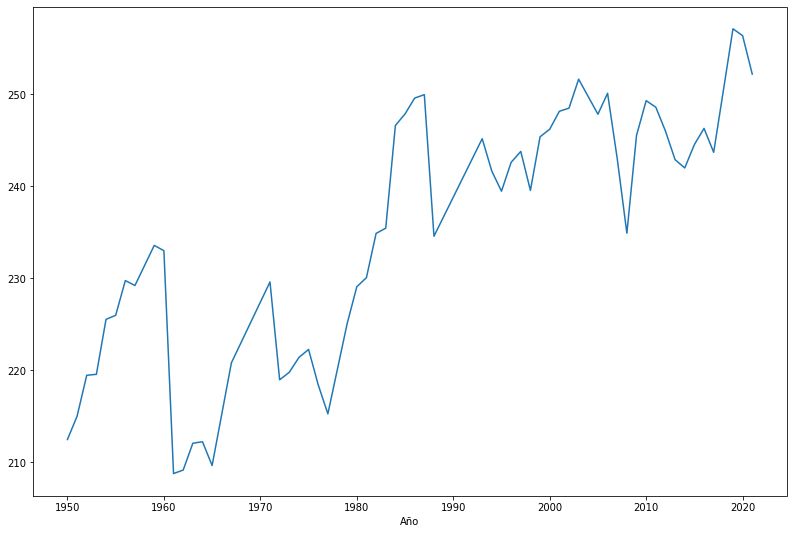

In [74]:
prueba_2['Velocidad_Media'].plot(figsize=(13.5,9))
plt.savefig("Evolución_Velocidad.png")


In [76]:
trace1 = go.Scatter(
                    x = prueba_2.index,
                    y = prueba_2.Velocidad_Media,
                    mode = "lines",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))



data = [trace1]
layout = dict(title = 'Evolución velocidad media en las carreras',
              xaxis= dict(title= 'Año',ticklen= 20,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

> Realizo gráfico con los 3 datos para ver realmente la relación entre los 3

In [109]:
Velocidad_Media = go.Scatter(
                    x = prueba_2.index,
                    y = prueba_2.Velocidad_Media,
                    mode = "lines",
                    marker = dict(color = 'rgba(150, 112, 2, 0.8)'))

Tiempo_Carreras = go.Scatter(
                    x = graf_fastest.index,
                    y = graf_fastest.Escala,
                    mode = "lines",
                    marker = dict(color = 'rgba(30, 112, 2, 0.8)'))

Vueltas_Rapidas = go.Scatter(
                    x = graf_vueltas_rapidas.index,
                    y = graf_vueltas_rapidas.Escala,
                    mode = "lines",
                    marker = dict(color = 'rgba(250, 112, 2, 0.8)'))





data = [Velocidad_Media,Tiempo_Carreras,Vueltas_Rapidas]
layout = dict(title = 'Evolución velocidad media en las carreras',
              xaxis= dict(title= 'Año',ticklen= 20,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

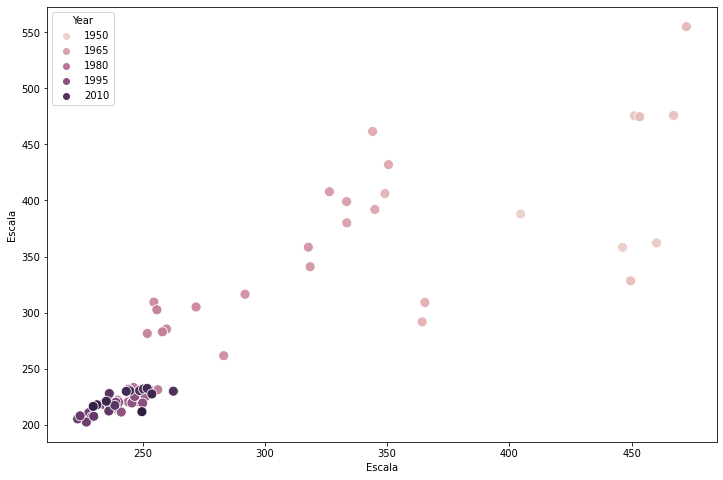

In [100]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=graf_fastest.Escala,
                y=graf_vueltas_rapidas.Escala,
                hue = graf_fastest.index,
               s=100);

plt.savefig("Relación_Year_Velocidad_Tiempos.png")